# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [2]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
import scipy as sp
from skimage import io

from skimage import img_as_float
from matplotlib import cm
from skimage import img_as_ubyte
from scipy import signal



Pretty printing has been turned OFF


## Filtering 
**1.1**

In [3]:
#function for nicely plotting response of a digital filter with parameters b, a
def showResponse(b, a):
    w, h = signal.freqz(b, a)

    plt.figure()
    plt.plot(w/np.pi, abs(h))
    plt.xlabel('Frequency in radians/second')
    plt.ylabel('Amplitude [dB]')
    #show log grid lines
    plt.grid(which='both', axis='both')

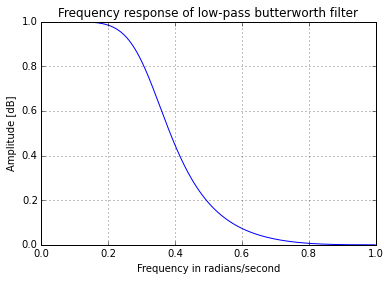

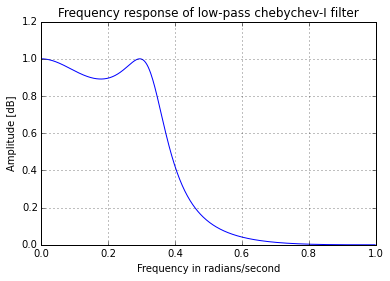

In [4]:
#Low pass filters, {butterworth, chebychev-I} 

#Design butterworth filter
#cutoff chosen as 1/3 * nyquist frequency
order = 3
cutoff = 1.0/3

#design butterworth filter with parameters defined above
#h is the frequency in radians/s and w the amplitude of response in dB
b,a = sp.signal.butter(order, cutoff, btype='low', analog=False, output='ba')

showResponse(b,a)
plt.title('Frequency response of low-pass butterworth filter')

#design chebychev filter with the same parameters
#ripple in dB is the maximum ripple allowed below unity gain in the passband
ripple = 1
b, a = sp.signal.cheby1(order, ripple, cutoff,'low', analog=False)

showResponse(b,a)
plt.title('Frequency response of low-pass chebychev-I filter')


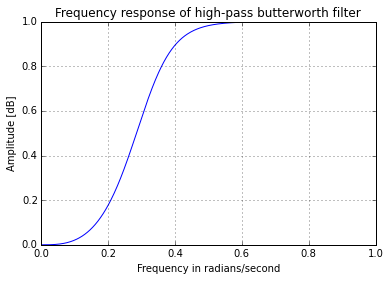

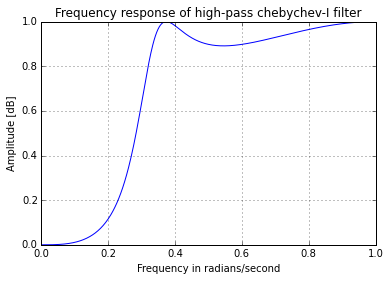

In [5]:
#High pass filters, {butterworth, chebychev-I} 

#Design butterworth filter
#cutoff chosen as 1/3 * nyquist frequency
order = 3
cutoff = 1.0/3

#design butterworth filter with parameters defined above
#h is the frequency in radians/s and w the amplitude of response in dB
b,a = sp.signal.butter(order, cutoff, btype='high', analog=False, output='ba')

showResponse(b, a)
plt.title('Frequency response of high-pass butterworth filter')

#design chebychev filter with the same parameters
#ripple in dB is the maximum ripple allowed below unity gain in the passband
ripple = 1
b, a = sp.signal.cheby1(order, ripple, cutoff,'high', analog=False)

showResponse(b, a)
plt.title('Frequency response of high-pass chebychev-I filter')


**1.2**

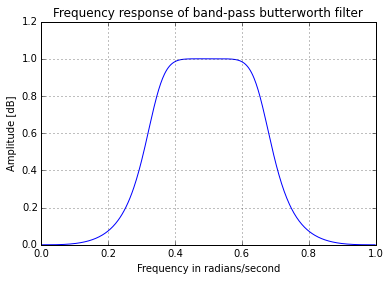

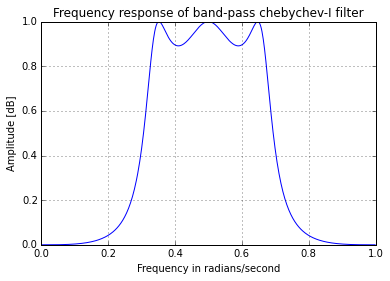

In [6]:
#Low pass filters, {butterworth, chebychev-I} 

#Design butterworth filter
#cutoff chosen as 1/3 * nyquist frequency
order = 3
cutoff = [1.0/3, 2.0/3]

#design butterworth filter with parameters defined above
#h is the frequency in radians/s and w the amplitude of response in dB
b,a = sp.signal.butter(order, cutoff, btype='band', analog=False, output='ba')

showResponse(b, a)
plt.title('Frequency response of band-pass butterworth filter')


#design chebychev filter with the same parameters
#ripple in dB is the maximum ripple allowed below unity gain in the passband
ripple = 1
b, a = sp.signal.cheby1(order, ripple, cutoff,'band', analog=False)

showResponse(b, a)
plt.title('Frequency response of band-pass chebychev-I filter')


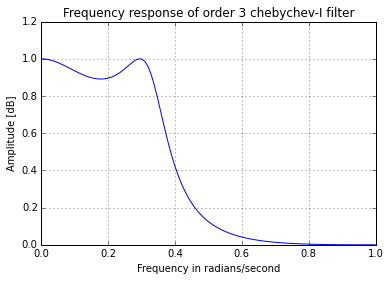

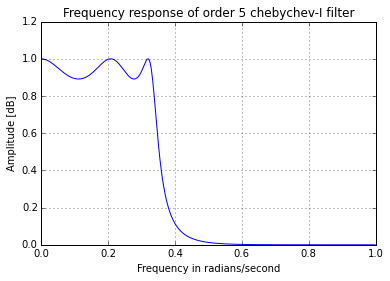

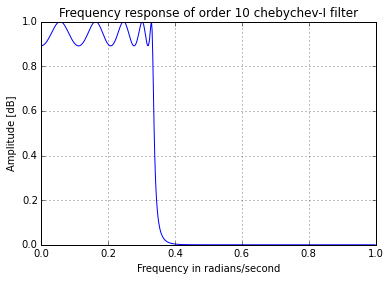

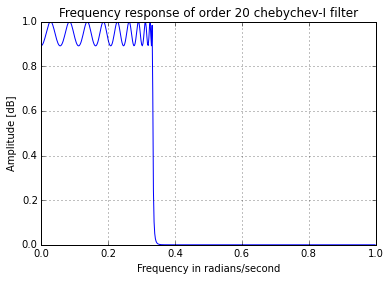

In [7]:
#Low pass filters, {butterworth, chebychev-I} 

#cutoff chosen as 1/3 * nyquist frequency
cutoff = 1.0/3

#design chebychev filter with the same parameters
#ripple in dB is the maximum ripple allowed below unity gain in the passband
ripple = 1

#order 3 low pass chebychev
order = 3
b, a = sp.signal.cheby1(order, ripple, cutoff,'low', analog=False)
showResponse(b, a)
plt.title('Frequency response of order 3 chebychev-I filter')

#order 5 low pass chebychev
order = 5
b, a = sp.signal.cheby1(order, ripple, cutoff,'low', analog=False)
showResponse(b, a)
plt.title('Frequency response of order 5 chebychev-I filter')

#order 5 low pass chebychev
order = 10
b, a = sp.signal.cheby1(order, ripple, cutoff,'low', analog=False)
showResponse(b, a)
plt.title('Frequency response of order 10 chebychev-I filter')

#order 5 low pass chebychev
order = 20
b, a = sp.signal.cheby1(order, ripple, cutoff,'low', analog=False)
showResponse(b, a)
plt.title('Frequency response of order 20 chebychev-I filter')

## Recursive filter 

**2.1**

<Container object of 3 artists>

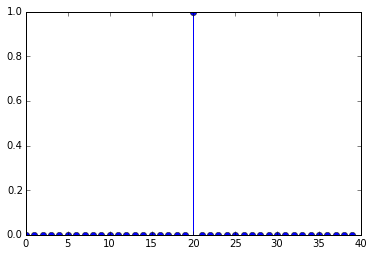

In [8]:
#construct delta(n - 20)
x = np.zeros(40)
x[20] = 1

plt.stem(x)


**2.2**

In [9]:
#causal smoothing 
def smoothingCausal(x, alpha):
    y = np.zeros(len(x))
    a = np.exp(-alpha)
    
    for i in range(0, len(x)):
          y[i] = (x[i] 
                + a*(alpha-1)*x[abs(i-1)]  *((i-1)>0)
                + 2*a*y[abs(i-1)]          *((i-1)>0) 
                - a**2 * y[abs(i-2)]       *((i-2)>0) 
                 )
            
    return(y)

In [10]:
#causal derivative
def derivativeCausal(x, s, alpha):
    y = np.zeros(len(x))
    a = np.exp(-alpha)
    
    for i in range(0, len(x)):
          y[i] = (-s*alpha*a*x[abs(i-1)]  *((i-1)>0) 
                  + 2*a*y[abs(i-1)]       *((i-1)>0) 
                  - a**2 * y[abs(i-2)]    *((i-2)>0)
                  )
            
    return(y)

In [11]:
#anticausal smoothing
def smoothingAnticausal(x, alpha):
    y = np.zeros(len(x))
    a = np.exp(-alpha)
    
    for k in range(len(x)-1, -1, -1):
        y[k] = (
                2*a*y[abs(k+1)* (k+1 < len(x))]     *(k+1 < len(x))
                - a**2 * y[abs(k+2)*(k+2 < len(x))] *(k+2 < len(x))
                + a * (alpha + 1) * x[abs(k+1) *(k+1 < len(x))]  
                                                    *(k+1 < len(x))
                - a**2 * x[abs(k+2)*(k+2 < len(x))] *(k+2 < len(x))
                )
    return (y)

In [12]:
#anticausal smoothing
def derivativeAnticausal(x, alpha, s):
    y = np.zeros(len(x))
    a = np.exp(-alpha)
    
    for k in range(len(x)-1, -1, -1):
        y[k] = (
                2*a*y[abs(k+1)* (k+1 < len(x))]     *(k+1 < len(x))
                - a**2 * y[abs(k+2)*(k+2 < len(x))] *(k+2 < len(x))
                + s*alpha*a * x[abs(k+1) *(k+1 < len(x))]  
                                                    *(k+1 < len(x))
                )
    return (y)

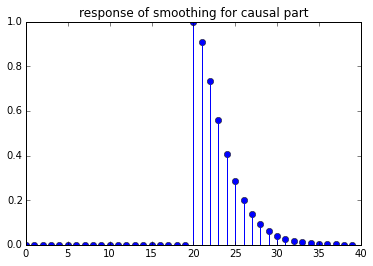

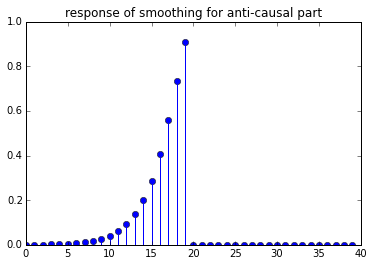

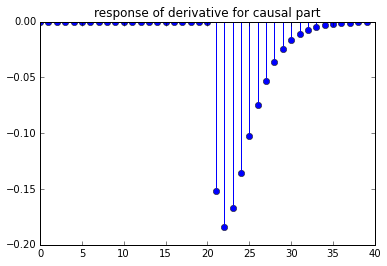

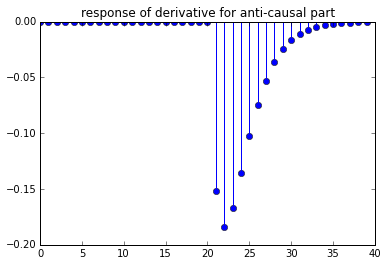

In [13]:
#define parameters for recursive filter
s = 0.5
Ts = 1
alpha = s*Ts

y1 = smoothingCausal(x, alpha)
plt.stem(y1)
plt.title('response of smoothing for causal part')

y2 = smoothingAnticausal(x, alpha)
plt.figure()
plt.stem(y2)
plt.title('response of smoothing for anti-causal part')

y3 = derivativeCausal(x, s, alpha)
plt.figure()
plt.stem(y3)
plt.title('response of derivative for causal part')

y4 = derivativeCausal(x, s, alpha)
plt.figure()
plt.stem(y4)
plt.title('response of derivative for anti-causal part')

**2.3**

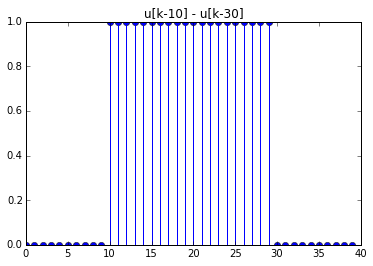

In [14]:
#construct u[k-10] - u[k-30]
x = np.zeros(40)
l1 = 10
l2 = 30

for i in range(0, len(x)):
    if (i >= l1) and (i < l2):
        x[i] = 1

plt.figure()
plt.stem(x)
plt.title('u[k-10] - u[k-30]')

**2.4**

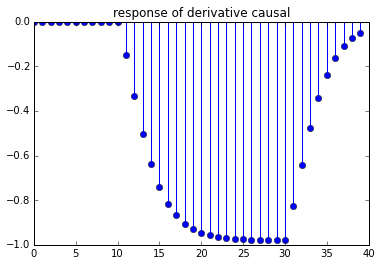

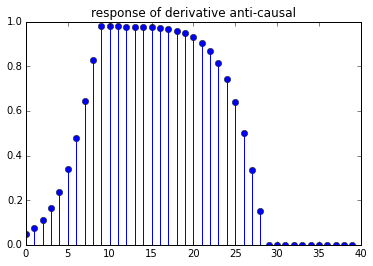

In [15]:
x_dc = derivativeCausal(x, s, alpha)
x_dac = derivativeAnticausal(x, s, alpha)

plt.figure()
plt.stem(x_dc)
plt.title('response of derivative causal')

plt.figure()
plt.stem(x_dac)
plt.title('response of derivative anti-causal')



**3.1**

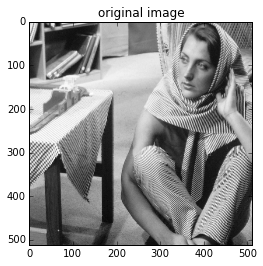

In [19]:
Im = io.imread('../images/barbara.gif')

plt.imshow(Im, cmap = 'Greys_r')
plt.title('original image')

**3.2** , **3.3**

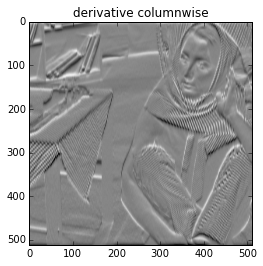

In [30]:
#application of derivative columnwise

m, n = np.shape(Im)
y_gradientHorizontal = np.zeros((m, n))

for col in range(0, n):
    x = Im[:,col]
    
    yc = derivativeCausal(x, s, alpha) 
    yac = derivativeAnticausal(x, s, alpha)
    
    y_gradientHorizontal[:,col] = yc + yac
    
plt.imshow(y_gradientHorizontal, cmap = 'Greys_r')
plt.title('derivative columnwise')

**3.4**

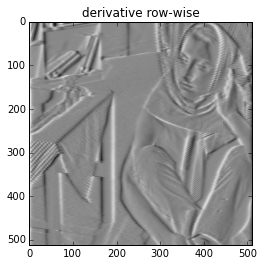

In [31]:
#application of derivative row-wise

m, n = np.shape(Im)
y_gradientHorizontal = np.zeros((m, n))

for row in range(0, m):
    x = Im[row,:]
    
    yc = derivativeCausal(x, s, alpha) 
    yac = derivativeAnticausal(x, s, alpha)
    
    y_gradientHorizontal[row,:] = yc + yac
    
plt.imshow(y_gradientHorizontal, cmap = 'Greys_r')
plt.title('derivative row-wise')